In [35]:
import numpy as np
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*
from utils_data_loading import*
from utils_features_manipulation import*
from standardization import*
import random

import matplotlib.pyplot as plt
from itertools import compress
from least_squares import *

In [6]:
def compute_gradient_L1(y, tx, w, lambda_):
    """Compute the gradient."""
    
    e = (y - tx.dot(w))
    return -(tx.transpose().dot(e) / y.shape[0]) + lambda_*np.sign(w)

def least_squares_L1(y, tx, initial_w, max_iters, gamma, lambda_):
    """Gradient descent algorithm."""

    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        g = compute_gradient_L1(y, tx, w, lambda_)
        loss = compute_mse(y, tx, w)

        # update w by gradient
        w = w - gamma*g

        # store w and loss
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return w, loss

In [7]:
traindata,_ = load_data('Data/train.csv')
X_total, Y_total = structure_data(traindata)

# Replacing undefined data with NaNs
X_nans = replace_bad_data_with_nans(X_total, -999)

X_nans, col = replace_nans_with_median(X_nans, threshold=0.5)

X_nans = standardize_data(X_nans)

In [144]:
dtmp_tr,dtmp_te = cross_validation(Y_total, X_nans, k_fold=4, seed=2, function_name='least_squares')
print("Baseline:", dtmp_tr, dtmp_te)

Baseline: 0.7339773333333333 0.7337959999999999


In [191]:
index_list = list(range(2,X_nans.shape[1]))

degree_test = [1, 1/4,1/3, 1/2, 2,3]
degree = [degree_test for i in range(X_nans.shape[1])]

#index_list = [1, 3, 5, 7, 13, 16, 18, 20, 23] 
#degree = [(0.25, 0.3333333333333333, 2), (0.03333333333333333, 0.1, 0.2, 0.3333333333333333, 0.5, 2), (0.1, 0.3333333333333333, 20), (0.03333333333333333, 0.05, 0.2, 0.3333333333333333, 30), (0.05, 10), (0.2, 0.25, 0.3333333333333333, 3, 4, 5), (3, 10, 20), (0.1, 0.3333333333333333, 4), (0.03333333333333333, 0.2, 1), (0.1, 2, 5), (0.05, 0.1, 1), (0.2, 0.3333333333333333, 0.5, 2, 4, 10), (0.1, 0.25, 0.3333333333333333, 1, 5, 30), (1, 3, 30), (0.1, 5, 10), (0.25, 3, 30), (0.1, 10, 30), (0.2, 1, 3), (0.05, 0.5, 30), (1, 3, 4), (0.3333333333333333, 3, 5), (2, 10), (0.25, 0.3333333333333333, 1), (0.05, 0.2, 30)]

X_poly = build_poly_index(X_nans, index_list, degree)

dtmp_tr,dtmp_te = cross_validation(Y_total, X_poly, k_fold=4, seed=1, function_name='least_squares')
print("Baseline:", dtmp_tr, dtmp_te)

Baseline: 0.78872 0.788544


In [199]:
max_iters = 1000
initial_w = np.ones((X_poly.shape[1]))*(0)
gamma = 1e-7
lambda_ =  1e-9
w, loss = least_squares_L1(Y_total, X_poly, initial_w, max_iters, gamma, lambda_)

Gradient Descent(0/999): loss=0.171334
Gradient Descent(1/999): loss=0.17132689577187044
Gradient Descent(2/999): loss=0.17132001410766098
Gradient Descent(3/999): loss=0.17131330255137775
Gradient Descent(4/999): loss=0.17130672130781865
Gradient Descent(5/999): loss=0.17130024018640608
Gradient Descent(6/999): loss=0.17129383628275077
Gradient Descent(7/999): loss=0.17128749221985443
Gradient Descent(8/999): loss=0.17128119481386736
Gradient Descent(9/999): loss=0.17127493406191388
Gradient Descent(10/999): loss=0.17126870237424593
Gradient Descent(11/999): loss=0.17126249399174623
Gradient Descent(12/999): loss=0.1712563045440353
Gradient Descent(13/999): loss=0.17125013071425127
Gradient Descent(14/999): loss=0.1712439699847435
Gradient Descent(15/999): loss=0.17123782044415561
Gradient Descent(16/999): loss=0.17123168064107405
Gradient Descent(17/999): loss=0.1712255494730063
Gradient Descent(18/999): loss=0.17121942610215626
Gradient Descent(19/999): loss=0.1712133098915325
Gradi

Gradient Descent(163/999): loss=0.17038461068745706
Gradient Descent(164/999): loss=0.1703791920192782
Gradient Descent(165/999): loss=0.17037377773292414
Gradient Descent(166/999): loss=0.17036836782341766
Gradient Descent(167/999): loss=0.17036296228578746
Gradient Descent(168/999): loss=0.17035756111506825
Gradient Descent(169/999): loss=0.17035216430630085
Gradient Descent(170/999): loss=0.170346771854532
Gradient Descent(171/999): loss=0.1703413837548144
Gradient Descent(172/999): loss=0.17033600000220656
Gradient Descent(173/999): loss=0.1703306205917733
Gradient Descent(174/999): loss=0.1703252455185852
Gradient Descent(175/999): loss=0.17031987477771873
Gradient Descent(176/999): loss=0.17031450836425627
Gradient Descent(177/999): loss=0.17030914627328636
Gradient Descent(178/999): loss=0.17030378849990319
Gradient Descent(179/999): loss=0.17029843503920705
Gradient Descent(180/999): loss=0.17029308588630404
Gradient Descent(181/999): loss=0.1702877410363062
Gradient Descent(18

Gradient Descent(322/999): loss=0.16957495891353336
Gradient Descent(323/999): loss=0.1695701781998151
Gradient Descent(324/999): loss=0.16956540114730467
Gradient Descent(325/999): loss=0.1695606277518922
Gradient Descent(326/999): loss=0.16955585800947257
Gradient Descent(327/999): loss=0.16955109191594556
Gradient Descent(328/999): loss=0.16954632946721612
Gradient Descent(329/999): loss=0.16954157065919379
Gradient Descent(330/999): loss=0.16953681548779329
Gradient Descent(331/999): loss=0.16953206394893408
Gradient Descent(332/999): loss=0.16952731603854068
Gradient Descent(333/999): loss=0.16952257175254237
Gradient Descent(334/999): loss=0.1695178310868733
Gradient Descent(335/999): loss=0.16951309403747256
Gradient Descent(336/999): loss=0.16950836060028399
Gradient Descent(337/999): loss=0.1695036307712567
Gradient Descent(338/999): loss=0.1694989045463441
Gradient Descent(339/999): loss=0.16949418192150476
Gradient Descent(340/999): loss=0.1694894628927022
Gradient Descent(3

Gradient Descent(484/999): loss=0.16884550179775332
Gradient Descent(485/999): loss=0.16884126387158951
Gradient Descent(486/999): loss=0.16883702900113784
Gradient Descent(487/999): loss=0.16883279718301342
Gradient Descent(488/999): loss=0.16882856841383545
Gradient Descent(489/999): loss=0.1688243426902272
Gradient Descent(490/999): loss=0.16882012000881588
Gradient Descent(491/999): loss=0.16881590036623273
Gradient Descent(492/999): loss=0.16881168375911318
Gradient Descent(493/999): loss=0.1688074701840964
Gradient Descent(494/999): loss=0.16880325963782583
Gradient Descent(495/999): loss=0.1687990521169488
Gradient Descent(496/999): loss=0.1687948476181165
Gradient Descent(497/999): loss=0.16879064613798447
Gradient Descent(498/999): loss=0.168786447673212
Gradient Descent(499/999): loss=0.1687822522204623
Gradient Descent(500/999): loss=0.1687780597764028
Gradient Descent(501/999): loss=0.16877387033770472
Gradient Descent(502/999): loss=0.16876968390104327
Gradient Descent(503

Gradient Descent(647/999): loss=0.16819277626071
Gradient Descent(648/999): loss=0.16818899445430097
Gradient Descent(649/999): loss=0.1681852152018947
Gradient Descent(650/999): loss=0.1681814385007037
Gradient Descent(651/999): loss=0.16817766434794398
Gradient Descent(652/999): loss=0.16817389274083488
Gradient Descent(653/999): loss=0.16817012367659898
Gradient Descent(654/999): loss=0.16816635715246217
Gradient Descent(655/999): loss=0.16816259316565352
Gradient Descent(656/999): loss=0.16815883171340573
Gradient Descent(657/999): loss=0.16815507279295433
Gradient Descent(658/999): loss=0.1681513164015385
Gradient Descent(659/999): loss=0.16814756253640045
Gradient Descent(660/999): loss=0.1681438111947858
Gradient Descent(661/999): loss=0.1681400623739434
Gradient Descent(662/999): loss=0.16813631607112545
Gradient Descent(663/999): loss=0.16813257228358724
Gradient Descent(664/999): loss=0.16812883100858741
Gradient Descent(665/999): loss=0.16812509224338784
Gradient Descent(666

Gradient Descent(809/999): loss=0.16761157979565697
Gradient Descent(810/999): loss=0.1676081775821155
Gradient Descent(811/999): loss=0.1676047775115026
Gradient Descent(812/999): loss=0.16760137958151758
Gradient Descent(813/999): loss=0.16759798378986232
Gradient Descent(814/999): loss=0.1675945901342416
Gradient Descent(815/999): loss=0.16759119861236288
Gradient Descent(816/999): loss=0.16758780922193614
Gradient Descent(817/999): loss=0.1675844219606742
Gradient Descent(818/999): loss=0.16758103682629272
Gradient Descent(819/999): loss=0.1675776538165098
Gradient Descent(820/999): loss=0.16757427292904625
Gradient Descent(821/999): loss=0.16757089416162577
Gradient Descent(822/999): loss=0.1675675175119746
Gradient Descent(823/999): loss=0.1675641429778217
Gradient Descent(824/999): loss=0.16756077055689864
Gradient Descent(825/999): loss=0.1675574002469398
Gradient Descent(826/999): loss=0.16755403204568212
Gradient Descent(827/999): loss=0.1675506659508652
Gradient Descent(828/

Gradient Descent(971/999): loss=0.16708683916634953
Gradient Descent(972/999): loss=0.16708375590306518
Gradient Descent(973/999): loss=0.1670806744431912
Gradient Descent(974/999): loss=0.1670775947848261
Gradient Descent(975/999): loss=0.16707451692607053
Gradient Descent(976/999): loss=0.16707144086502745
Gradient Descent(977/999): loss=0.16706836659980187
Gradient Descent(978/999): loss=0.16706529412850132
Gradient Descent(979/999): loss=0.16706222344923538
Gradient Descent(980/999): loss=0.1670591545601157
Gradient Descent(981/999): loss=0.16705608745925635
Gradient Descent(982/999): loss=0.16705302214477347
Gradient Descent(983/999): loss=0.16704995861478564
Gradient Descent(984/999): loss=0.1670468968674134
Gradient Descent(985/999): loss=0.16704383690077948
Gradient Descent(986/999): loss=0.16704077871300904
Gradient Descent(987/999): loss=0.16703772230222913
Gradient Descent(988/999): loss=0.16703466766656927
Gradient Descent(989/999): loss=0.16703161480416098
Gradient Descent

In [150]:
sort = np.sort(abs(w))

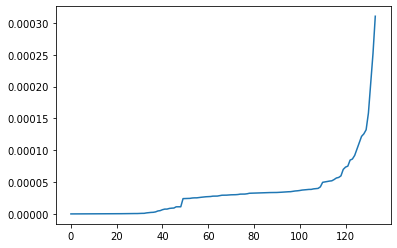

In [151]:
plt.plot(range(len(w)),sort)

In [172]:
filt = abs(w)>0.0005e-5
sum(filt)/len(w)

0.9925373134328358

In [173]:
id_list = []
di = 0
for i in range(len(X_nans[0])):
    if i in index_list:
        for deg in degree[di]:
            id_list.append([i,deg])
        di=+1
    else:
        id_list.append([i])
        
id_filt = list(compress(id_list, filt))

In [174]:
index_list_f = list(np.unique([i[0] for i in id_filt]))

degree_f = [[] for i in range(X_nans.shape[1])]
for i in id_filt:
    if len(i)==1:
        degree_f[i[0]].append(1)
    else:
        degree_f[i[0]].append(i[1])

In [175]:
X_poly_f = build_poly_index(X_nans, index_list_f, degree_f)

dtmp_tr,dtmp_te = cross_validation(Y_total, X_poly_f, k_fold=4, seed=2, function_name='least_squares')
print("Baseline:", dtmp_tr, dtmp_te)

Baseline: 0.7887013333333333 0.788172


In [ ]:
tx = X_poly
y = Y_total
w = np.random.randn((X_poly.shape[1]))*(0.001)

In [ ]:
tx.dot(w)

In [ ]:
np.dot(X_poly, w)